
# Hi, I'm everydaycodings! 👋

# EDA on NYC Motor Vehicle Collisions to Person

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [126]:
pd.set_option('display.max_columns', 500)

In [127]:
data = pd.read_csv("Datasets/NYC_Motor_Vehicle_Collisions_to_Person/NYC_Motor_Vehicle_Collisions_to_Person.csv")
data.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Severe Bleeding,Apparent Death,NaN,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,NaN,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,NaN,NaN,Trapped,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,NaN,Driver,Driver,11819198,NaN,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,NaN,NaN,Not Ejected,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,NaN,Driver,Driver,11998317,NaN,4467504
3,2021-04-17,13:00,Killed,71.0,Head,NaN,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,NaN,Internal,Unconscious,NaN,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,NaN,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,NaN,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,NaN,None Visible,Conscious,NaN,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,NaN,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


# Getting the general view of the Data

In [128]:
data.columns

Index(['CRASH_DATE', 'CRASH_TIME', 'PERSON_INJURY', 'PERSON_AGE',
       'BODILY_INJURY', 'SAFETY_EQUIPMENT', 'PERSON_SEX', 'PERSON_TYPE',
       'PED_LOCATION', 'CONTRIBUTING_FACTOR_2', 'EJECTION', 'COMPLAINT',
       'EMOTIONAL_STATUS', 'VEHICLE_ID', 'PERSON_ID', 'CONTRIBUTING_FACTOR_1',
       'POSITION_IN_VEHICLE', 'PED_ROLE', 'UNIQUE_ID', 'PED_ACTION',
       'COLLISION_ID'],
      dtype='object')

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45669 entries, 0 to 45668
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CRASH_DATE             45669 non-null  object 
 1   CRASH_TIME             45669 non-null  object 
 2   PERSON_INJURY          45669 non-null  object 
 3   PERSON_AGE             45248 non-null  float64
 4   BODILY_INJURY          45669 non-null  object 
 5   SAFETY_EQUIPMENT       39434 non-null  object 
 6   PERSON_SEX             45669 non-null  object 
 7   PERSON_TYPE            45669 non-null  object 
 8   PED_LOCATION           6571 non-null   object 
 9   CONTRIBUTING_FACTOR_2  6546 non-null   object 
 10  EJECTION               39429 non-null  object 
 11  COMPLAINT              45669 non-null  object 
 12  EMOTIONAL_STATUS       45669 non-null  object 
 13  VEHICLE_ID             39098 non-null  float64
 14  PERSON_ID              45669 non-null  object 
 15  CO

# Handling Numerical Columns

### Seperating the numerical Columns from dataset and getting the null values of it

In [130]:
num_categories = [feature for feature in data.columns if data[feature].dtypes != "O"] # here "O" basically means object which represents string values
data[num_categories].isnull().sum()

PERSON_AGE       421
VEHICLE_ID      6571
UNIQUE_ID          0
COLLISION_ID       0
dtype: int64

### After geting the numerical value we not drop that missing value instead we will fill all the messing values with median number

#### Here I have used ``median()`` insted of ``mean()`` to avoid *outliers*

In [169]:
for feature in num_categories:
    median_values = data[feature].median()
    data[feature] = data[feature].fillna(median_values)

data.head(3)

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,missing values,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,missing values,Severe Bleeding,Apparent Death,20008772.5,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,missing values,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,missing values,missing values,Trapped,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,missing values,Driver,Driver,11819198,missing values,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,missing values,missing values,Not Ejected,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,missing values,Driver,Driver,11998317,missing values,4467504


# Handling Categorical Columns

### Seperating the Categorical Columns from Datset and getting the null values of it

In [132]:
cat_categories = [feature for feature in data.columns if data[feature].dtypes == "O"]
data[cat_categories].isnull().sum()

CRASH_DATE                   0
CRASH_TIME                   0
PERSON_INJURY                0
BODILY_INJURY                0
SAFETY_EQUIPMENT          6235
PERSON_SEX                   0
PERSON_TYPE                  0
PED_LOCATION             39098
CONTRIBUTING_FACTOR_2    39123
EJECTION                  6240
COMPLAINT                    0
EMOTIONAL_STATUS             0
PERSON_ID                    0
CONTRIBUTING_FACTOR_1    39111
POSITION_IN_VEHICLE       6221
PED_ROLE                     0
PED_ACTION               39098
dtype: int64

### After geting the Categorial Columns insted of droping the NaN values we will be filling it with *missing values*

In [133]:
data[cat_categories] = data[cat_categories].fillna("missing values")
data.head()

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,missing values,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,missing values,Severe Bleeding,Apparent Death,20008772.5,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,missing values,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,missing values,missing values,Trapped,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,missing values,Driver,Driver,11819198,missing values,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,missing values,missing values,Not Ejected,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,missing values,Driver,Driver,11998317,missing values,4467504
3,2021-04-17,13:00,Killed,71.0,Head,missing values,M,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,missing values,Internal,Unconscious,20008772.5,b950706b-00a4-485c-84c5-777208cc3cc9,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,missing values,Pedestrian,11745791,"Crossing, No Signal, or Crosswalk",4408062
4,2021-05-25,22:00,Killed,69.0,Entire Body,missing values,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian Not at I...,Unspecified,missing values,None Visible,Conscious,20008772.5,6504ea0a-c92d-444c-8127-284943be9aac,Unspecified,missing values,Pedestrian,11991283,"Crossing, No Signal, Marked Crosswalk",4420918


## CrossChecking if there are more NaN values  Left or Not.

In [134]:
data.isnull().sum()

CRASH_DATE               0
CRASH_TIME               0
PERSON_INJURY            0
PERSON_AGE               0
BODILY_INJURY            0
SAFETY_EQUIPMENT         0
PERSON_SEX               0
PERSON_TYPE              0
PED_LOCATION             0
CONTRIBUTING_FACTOR_2    0
EJECTION                 0
COMPLAINT                0
EMOTIONAL_STATUS         0
VEHICLE_ID               0
PERSON_ID                0
CONTRIBUTING_FACTOR_1    0
POSITION_IN_VEHICLE      0
PED_ROLE                 0
UNIQUE_ID                0
PED_ACTION               0
COLLISION_ID             0
dtype: int64

# Handling DateTime Columns

In [135]:
data['CRASH_DATE']=pd.to_datetime(data['CRASH_DATE'])
data.head(3)

,CRASH_DATE,CRASH_TIME,PERSON_INJURY,PERSON_AGE,BODILY_INJURY,SAFETY_EQUIPMENT,PERSON_SEX,PERSON_TYPE,PED_LOCATION,CONTRIBUTING_FACTOR_2,EJECTION,COMPLAINT,EMOTIONAL_STATUS,VEHICLE_ID,PERSON_ID,CONTRIBUTING_FACTOR_1,POSITION_IN_VEHICLE,PED_ROLE,UNIQUE_ID,PED_ACTION,COLLISION_ID
0,2021-05-02,21:00,Killed,62.0,Head,missing values,F,Pedestrian,Pedestrian/Bicyclist/Other Pedestrian at Inter...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,missing values,Severe Bleeding,Apparent Death,20008772.5,f2f329b6-2dfc-4bd0-b751-2e4255f1ea06,Traffic Control Disregarded,missing values,Pedestrian,11791937,Crossing Against Signal,4412948
1,2021-05-21,0:00,Killed,24.0,Entire Body,Air Bag Deployed,M,Occupant,missing values,missing values,Trapped,Internal,Apparent Death,19986231.0,e27e12a2-0485-4e22-b692-3f8a765d2582,missing values,Driver,Driver,11819198,missing values,4419608
2,2021-10-15,2:00,Killed,30.0,Head,None,M,Occupant,missing values,missing values,Not Ejected,Internal,Apparent Death,20091024.0,1a6f5aa7-5125-4be2-8499-fe7977cb0d90,missing values,Driver,Driver,11998317,missing values,4467504


# **EDA** (Exploring the various columns relation with different type of graphs)

#### Person Age and Person Sex Bar Graph in releation to Person Injury

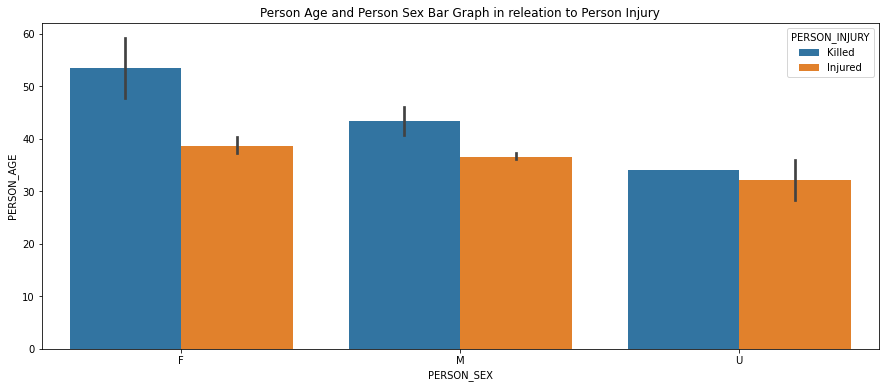

In [162]:
plt.figure(figsize=(15,6))
sns.barplot(x="PERSON_SEX", y= "PERSON_AGE", hue="PERSON_INJURY", data=data)
plt.title('Person Age and Person Sex Bar Graph in releation to Person Injury')
plt.show()

#### Complaint bar graph after Accident

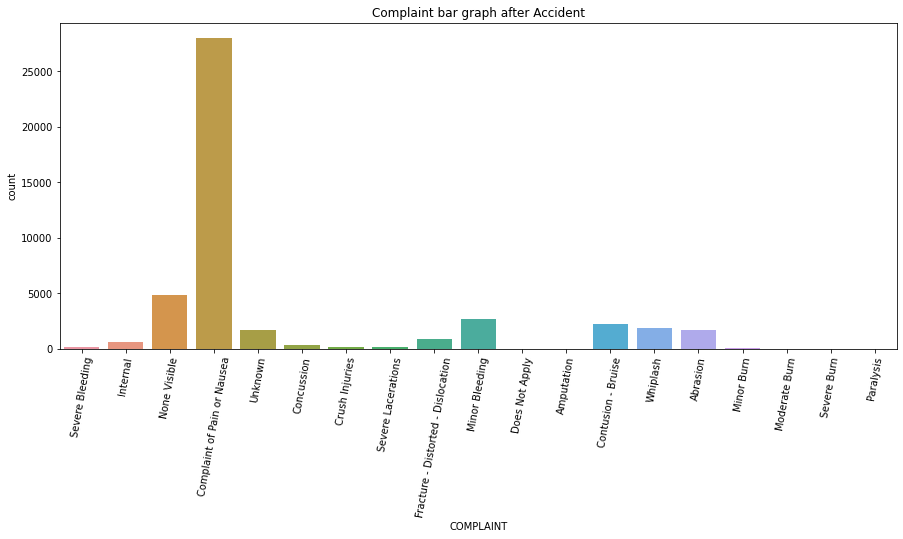

In [161]:
plt.figure(figsize=(15,6))
sns.countplot(x="COMPLAINT", data=data)
plt.title('Complaint bar graph after Accident')
plt.xticks(rotation=80)
plt.show()

#### Relation Between Ejection type and Emotional Status

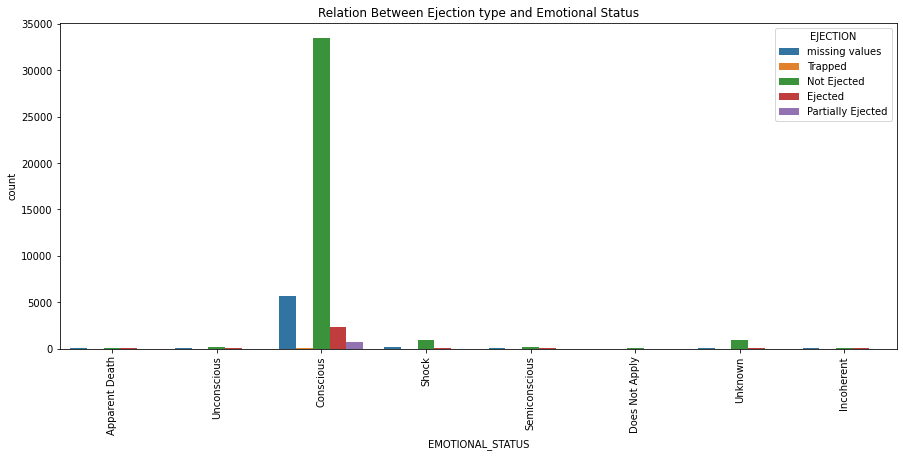

In [155]:
plt.figure(figsize=(15,6))
sns.countplot(x= "EMOTIONAL_STATUS", hue="EJECTION", data=data)
plt.title('Relation Between Ejection type and Emotional Status')
plt.xticks(rotation=90)
plt.show()

#### Relation Between Body Injury and PED Role

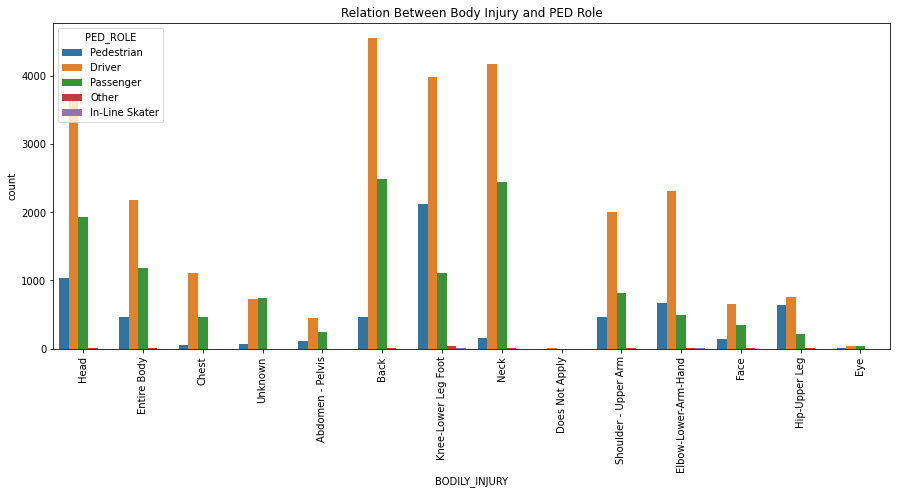

In [165]:
plt.figure(figsize=(15,6))
sns.countplot(x= "BODILY_INJURY", hue="PED_ROLE", data=data)
plt.title('Relation Between Body Injury and PED Role')
plt.xticks(rotation=90)
plt.show()

#### 2021 Collisions Each Month

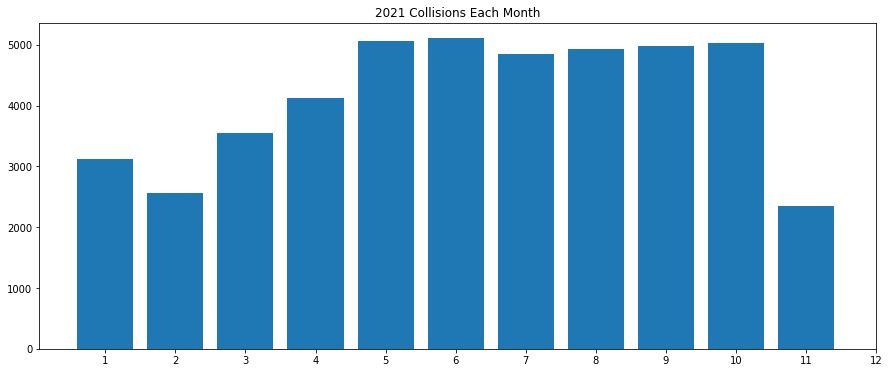

In [168]:
plt.figure(figsize=(15,6))
data_for_month = data['CRASH_DATE'].dt.month.value_counts().sort_index()
plt.bar(data_for_month.index,data_for_month.values)
plt.title('2021 Collisions Each Month')
plt.xticks(range(1,13))
plt.show()

#### 2021 Collisions Each Hours

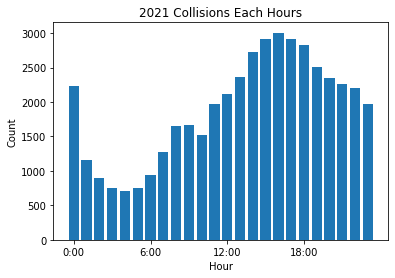

In [166]:
# This Peace of code was taken form a notebook [When do the most traffic accidents occur?] from a Kaggle user @kukuroo3 

dfp= data['CRASH_TIME'].str.split(':').str[0].astype('int').value_counts().sort_index()
plt.bar(dfp.index,dfp.values)

plt.xticks(range(0,24,6),[str(x)+":00" for x in range(0,24,6)])
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('2021 Collisions Each Hours')
plt.show()


# Result Of **EDA**

### 1) Accoring to the data there are more person killed then Injured in the Accident.
### 2) Accoring to the data Females accidents rate are more than male accident rate.
### 3) Accoring to the data age between 40-50 has the most tendency to fall in an accident.
### 4) Accoring to the data the people who got Injured are more likely to complain about Pain, Nausea, None Vision and Minor Bleeding
### 5) Accoring to the data if seat-belts are not ejected people are likely to be in Conscious but in shock state
### 6) Accoring to the data Divers are in the most danger as they have maximum number of Body Injuries other than pedestrian and passenger
### 7) Accoring to the data Head Injury, Back Injury, Knee-lower-leg-foot Injury and Neck Injury are the most comman Injury during Road Accident
### 8) Accoring to the data Month of May-June are the most dangrous month as most of the accident occours in this particaular month
